# Health's impact on Covid-19 - TWD project 2 - kody do wykresów
## Wstępne informacje

Autorzy: 

* Przemysław Olender 
* Paweł Wojciechowski
* Krzysztof Wolny

Data: 12.12.2020r.


## Wczytanie bibliotek

In [1]:
library(dplyr)
library(ggplot2)
library(patchwork)
library(repr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Wczytanie danych

In [2]:
#główna ramka danych o koronawirusie, dev level to 3 kategorie hdi

owid <- read.csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

owid <- owid %>% 
  mutate(dev_level = ifelse(human_development_index < 0.6, 1, ifelse(human_development_index < 0.8, 2, 3)))

now <- owid %>% 
  filter(date == '2020-11-11')

In [3]:
# ramka danych o ilości kalorii produktów w diecie w różnych krajach. 
# złączona z owid

kcal <- read.csv('./datasets/Food_Supply_kcal_Data.csv')

joined_df <- merge(now, kcal, by.x = 'location', by.y = 'Country')

joined_df <- joined_df%>%
  filter(!is.na(dev_level) & dev_level != 1)

In [4]:
# ramka danych o zanieczyszczeniu powietrza na świecie
AIRPOL <- read.csv("./datasets/WHOairpollution.csv")

AIRPOL <- AIRPOL%>%
select(SpatialDim, TimeDim, Dim2, NumericValue)

AIRPOL <- AIRPOL%>%
left_join(now, by=c('SpatialDim'='iso_code'))

## Bar Plot 

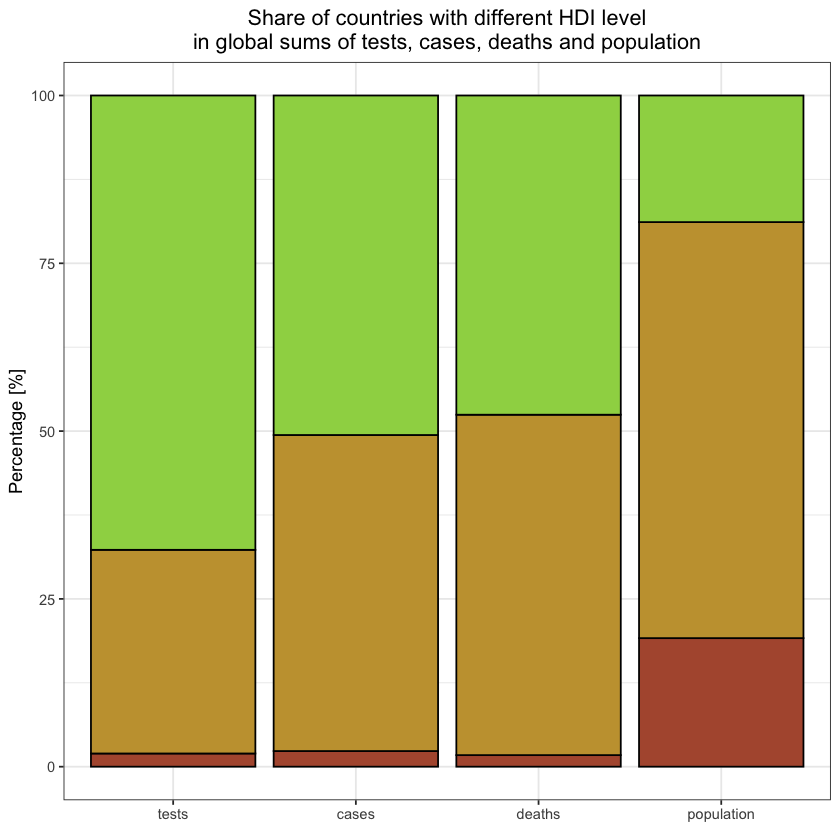

In [5]:
now2 <- now  %>% mutate(total_tests = ifelse(is.na(total_tests), 0, total_tests)) %>% 
            mutate(total_cases = ifelse(is.na(total_cases), 0, total_cases)) %>% 
            mutate(total_deaths = ifelse(is.na(total_deaths), 0, total_deaths))
           
l <- now2  %>% filter(dev_level == 1)
m <- now2  %>% filter(dev_level == 2)
h <- now2  %>% filter(dev_level == 3)



c_l <- sum(l$total_cases)
c_m <- sum(m$total_cases)
c_h <- sum(h$total_cases)
s <- sum(c_l, c_m, c_h)
c_l <- c_l / s *100
c_m <- c_m / s *100
c_h <- c_h / s *100

d_l <- sum(l$total_deaths)
d_m <- sum(m$total_deaths)
d_h <- sum(h$total_deaths)
s <- sum(d_l, d_m, d_h)
d_l <- d_l / s *100
d_m <- d_m / s *100
d_h <- d_h / s *100

t_l <- sum(l$total_tests)
t_m <- sum(m$total_tests)
t_h <- sum(h$total_tests)
s <- sum(t_l, t_m, t_h)
t_l <- t_l / s *100
t_m <- t_m / s *100
t_h <- t_h / s *100

p_l <- sum(l$population)
p_m <- sum(m$population)
p_h <- sum(h$population)
s <- sum(p_l, p_m, p_h)
p_l <- p_l / s * 100
p_m <- p_m / s * 100
p_h <- p_h / s * 100


df <- data.frame(c('low', 'medium', 'high', 'low', 'medium', 'high', 'low', 'medium', 'high', 'low', 'medium', 'high'),
                 c(t_l, t_m, t_h, c_l, c_m, c_h, d_l, d_m, d_h, p_l, p_m, p_h),
                 c('tests', 'tests', 'tests', 'cases', 'cases', 'cases', 'deaths', 'deaths', 'deaths', 'population', 'population', 'population'))

colnames(df) <- c('development_level', 'percentage', 'type')

df$development_level <- factor(df$development_level, levels = c('high', 'medium', 'low'))

df$type <- factor(df$type, levels = c('tests', 'cases', 'deaths', 'population'))



ggplot(df, aes(x = type, y = percentage, fill = development_level, color = 'black')) + 
    geom_col(color = 'black') +
    ggtitle("Share of countries with different HDI level\nin global sums of tests, cases, deaths and population") +
    xlab(element_blank()) + 
    ylab(element_text("Percentage [%]")) + 
    scale_fill_manual(values=c("#9dd452","#c6a03d", "#b1583c")) +
    theme_bw() +
    theme(
          legend.position = "none",
          #legend.title = element_text('development level'),
          plot.title = element_text(size = 13, hjust = 0.5),
         )  

## HDI and testing

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


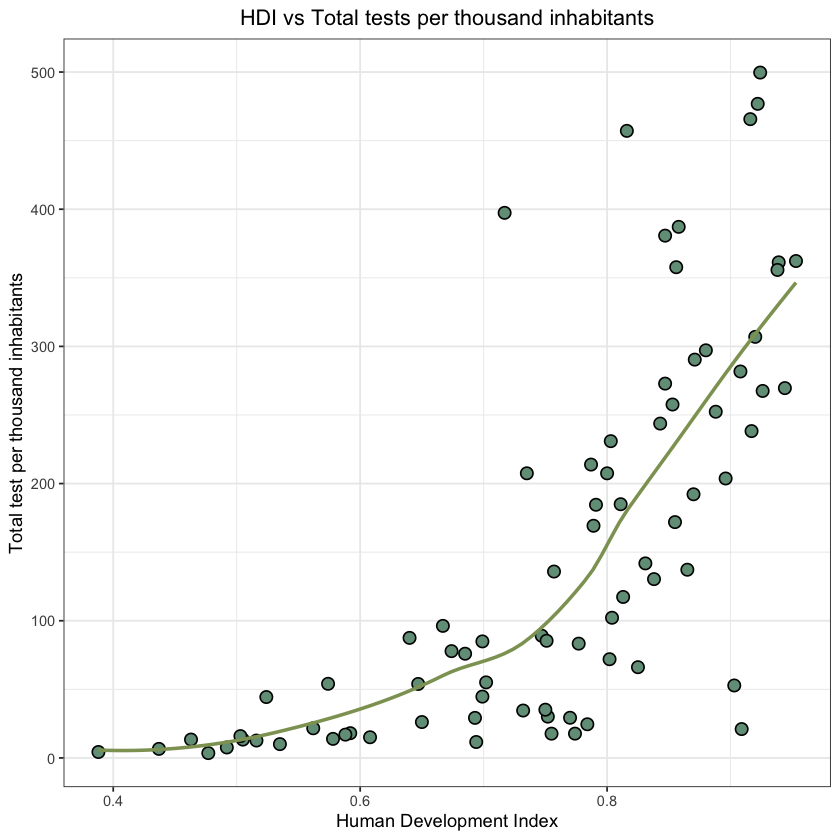

In [6]:
ggplot(now%>%filter(total_tests_per_thousand<500), aes(x=human_development_index , y=total_tests_per_thousand ))+
  geom_point(shape = 21,colour = "black", fill = "#739d88", size = 3, stroke = 0.7)+
  geom_smooth(se=FALSE, color='#8ea061')+
  theme_bw()+
  labs(x="Human Development Index", y="Total test per thousand inhabitants",
       title="HDI vs Total tests per thousand inhabitants")+
  theme(plot.title = element_text(size = 13, hjust = 0.5))

# ggsave("tests and hdi.png", dpi = 300, width = 16, height = 14, units = "cm")

## Vegetal Products

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


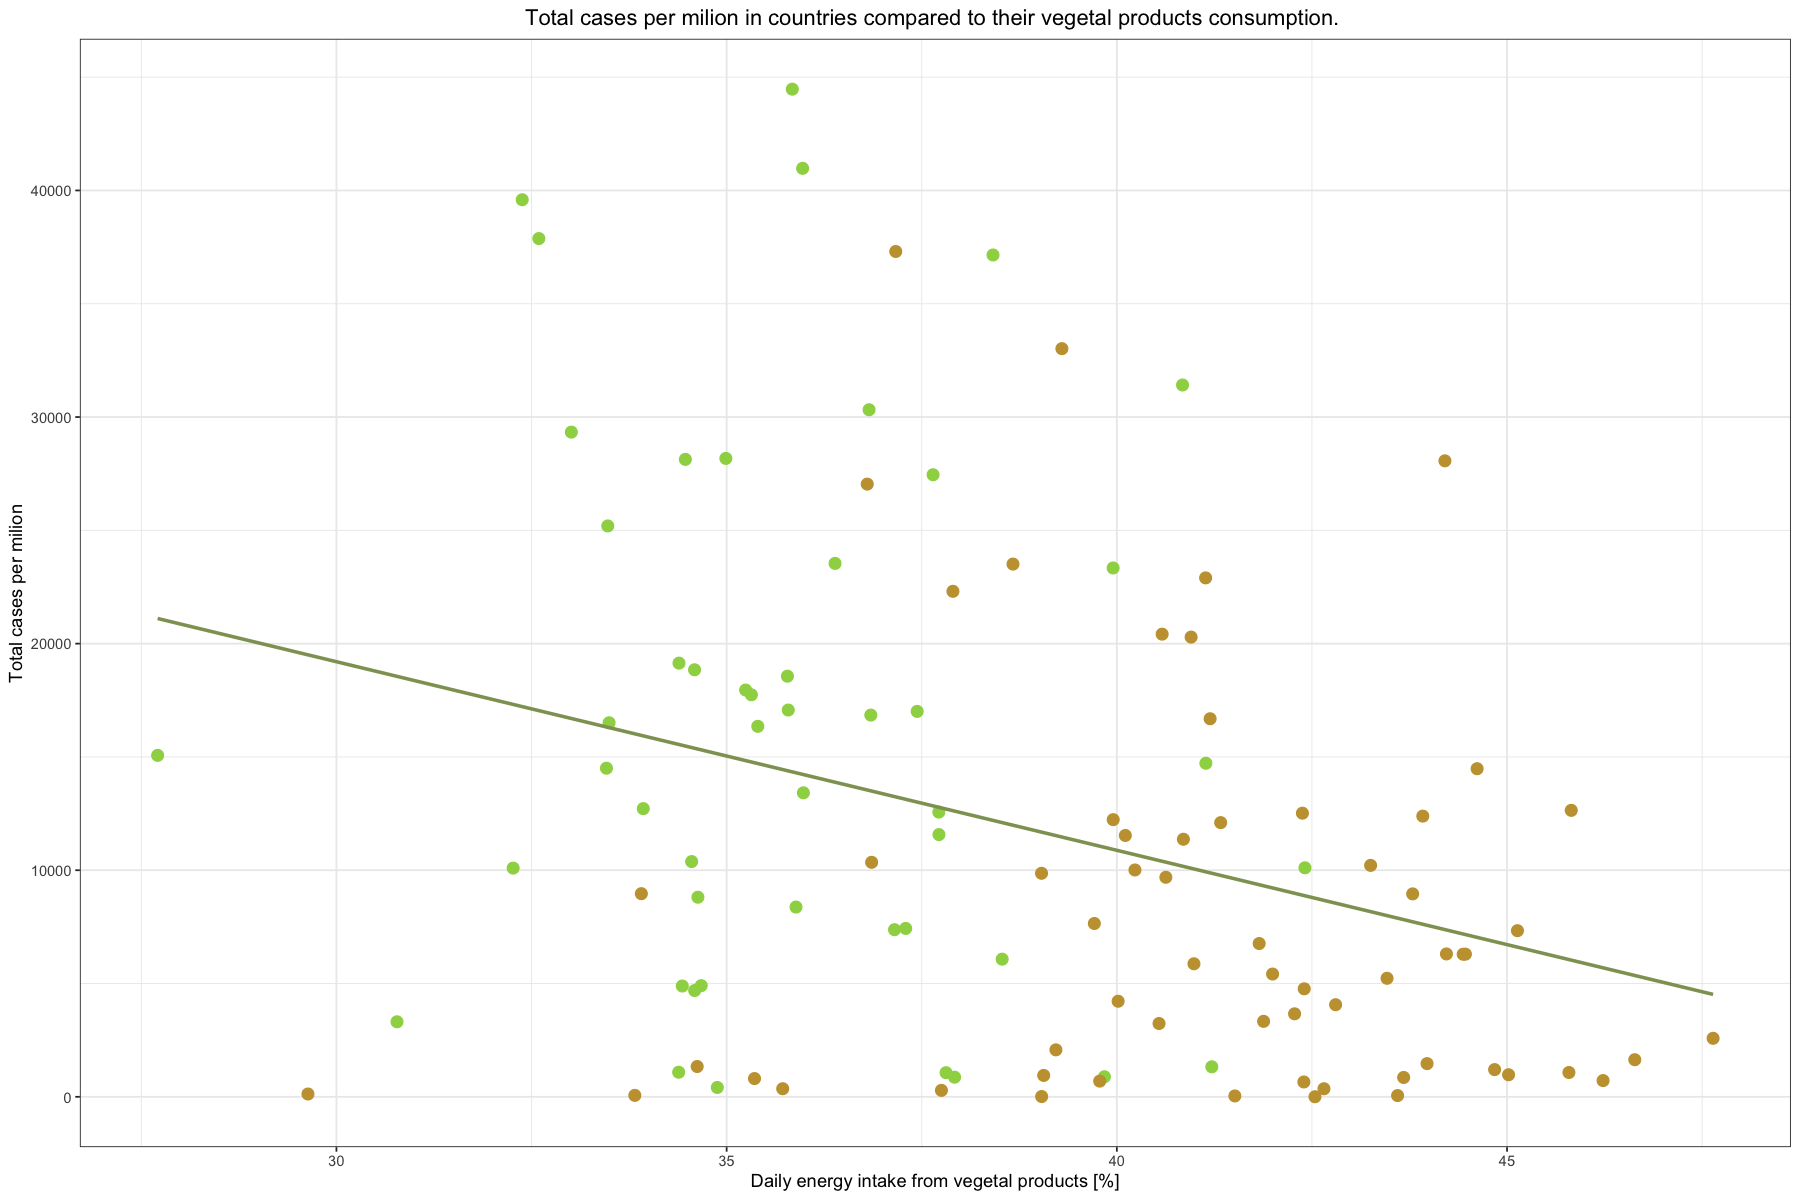

In [10]:
ggplot(data=joined_df, aes(x=Vegetal.Products, y=total_cases_per_million, color = as.factor(dev_level)))+
  geom_point(size = 3)+
  geom_smooth(
    aes(x=Vegetal.Products, y=total_cases_per_million), 
              method = lm, se = FALSE, 
              inherit.aes=FALSE, 
              color
    = '#8ea061') + 
  scale_color_manual(values=c("#c6a03d", "#9dd452")) + 
  theme_bw() + 
  theme(legend.position = "none", 
        plot.title = element_text(hjust = 0.5)) + 
  ylab("Total cases per milion") + 
  xlab("Daily energy intake from vegetal products [%]") + 
  labs(title = 'Total cases per milion in countries compared to their vegetal products consumption. ', 
       size = 13)

## Smoking and Alcohol

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 20 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 20 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


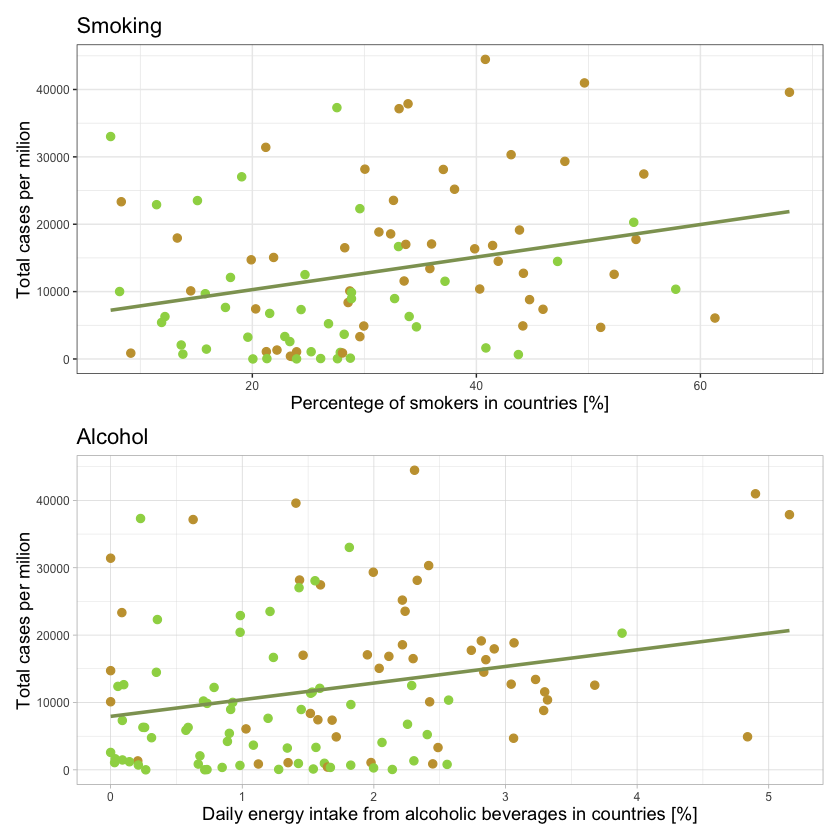

In [8]:
# Jako, że mamy tylko dane palących kobiet i mężczyzn to zakładamy, że ilość palaczy jest równa średniej tych wartości. 

p1 <- ggplot(data=joined_df, aes(x=female_smokers+male_smokers/2, y=total_cases_per_million, color = as.factor(dev_level)))+
  geom_point(size = 2)+
  geom_smooth(aes(x=female_smokers+male_smokers/2, y=total_cases_per_million), 
              method = lm, se = FALSE, 
              inherit.aes=FALSE, 
              color = '#8ea061') + 
  scale_color_manual(values=c("#9dd452", "#c6a03d")) + 
  theme_bw(base_size = 9) + 
  ylab("Total cases per milion") + 
  xlab("Percentege of smokers in countries [%]") + 
  labs(title = 'Smoking') + 
  theme(legend.position = "none", 
        title = element_text(size = 11))

p2 <- ggplot(data=joined_df, aes(x=Alcoholic.Beverages, y=total_cases_per_million, color = as.factor(dev_level)))+
  geom_point(size = 2)+
  geom_smooth(aes(x=Alcoholic.Beverages, y=total_cases_per_million), 
              method = lm, se = FALSE, 
              inherit.aes=FALSE, 
              color = '#8ea061') + 
  scale_color_manual(values=c("#9dd452", "#c6a03d")) + 
  theme_light(base_size = 9) + 
  ylab("Total cases per milion") + 
  xlab("Daily energy intake from alcoholic beverages in countries [%]") + 
  labs(title = 'Alcohol')+ 
  theme(legend.position = "none", 
        title = element_text(size = 11))

p <- (p1 / p2) 

p

## Pulmunatory disease

`geom_smooth()` using formula 'y ~ x'



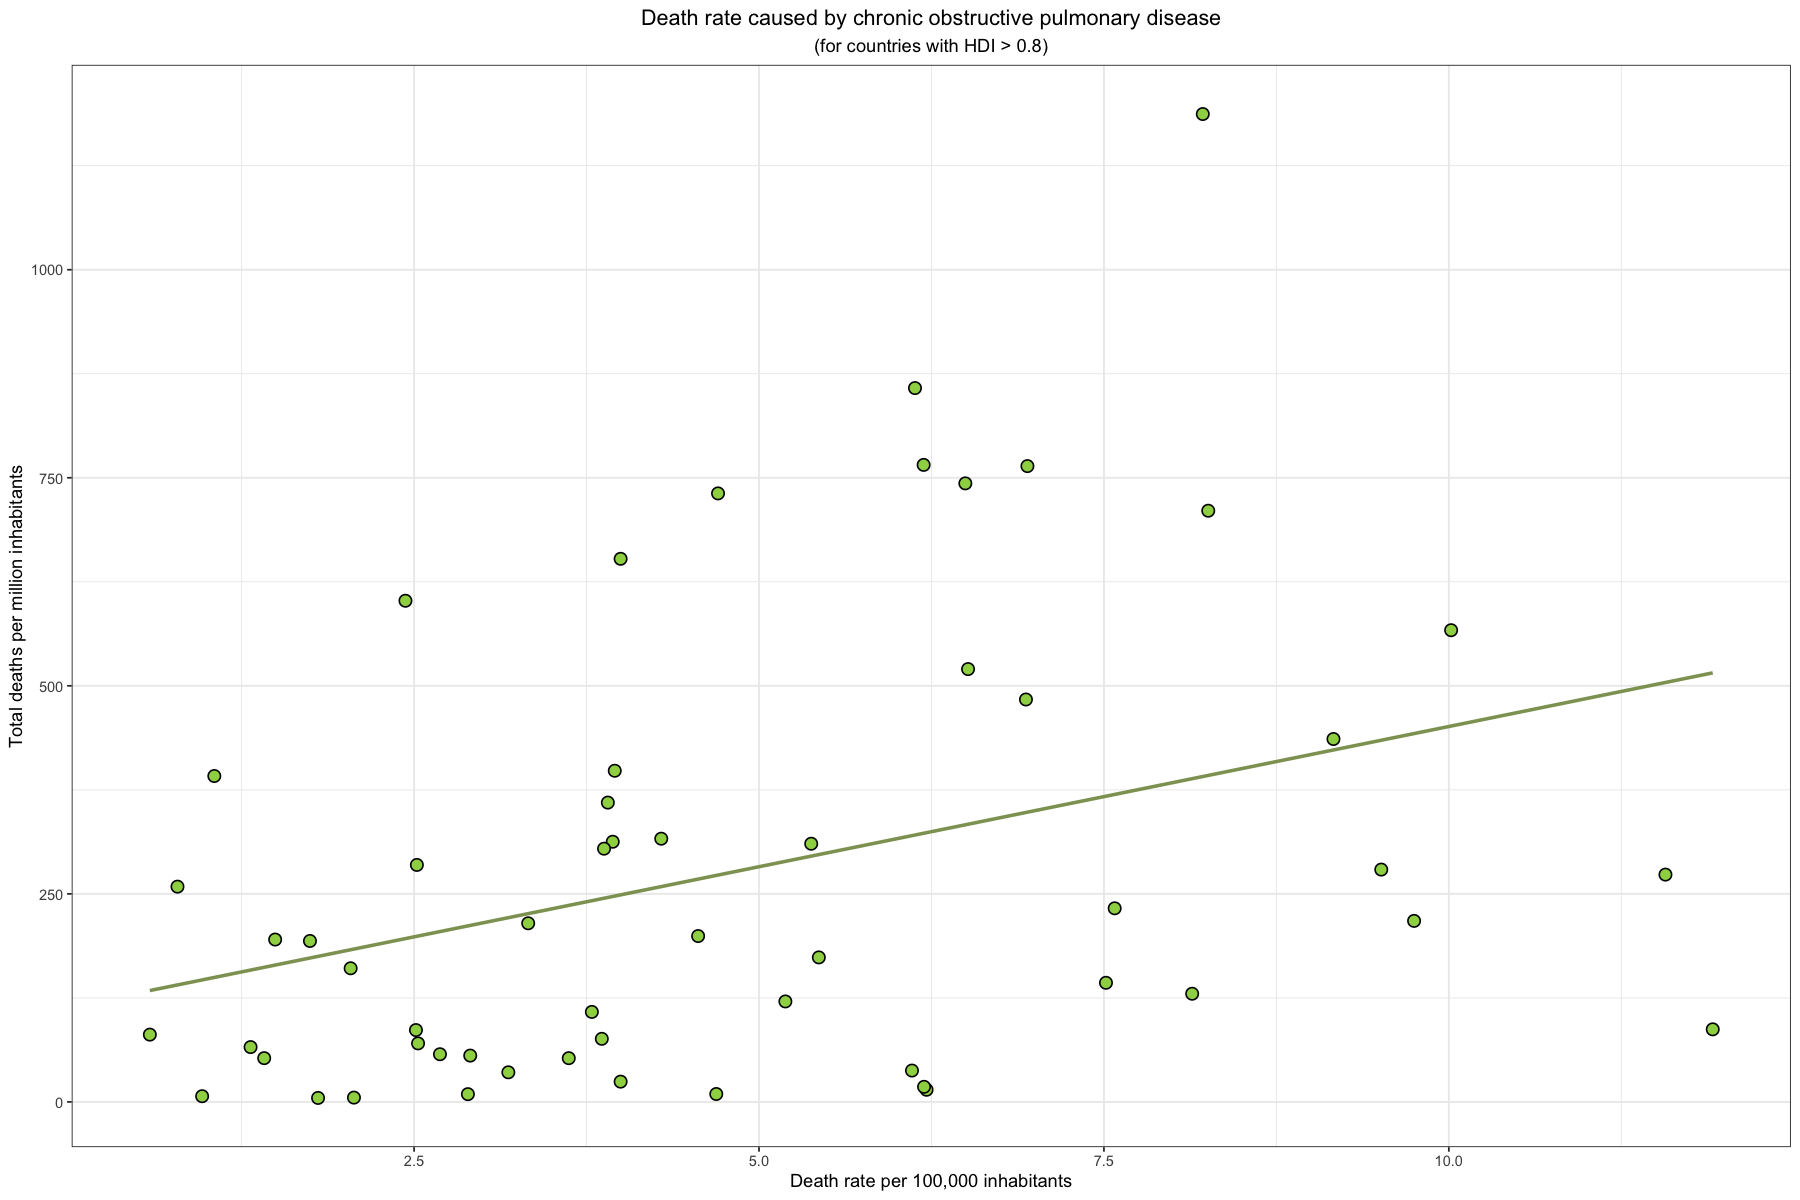

In [9]:
options(repr.plot.width=15, repr.plot.height=10)

ggplot(AIRPOL%>%filter(Dim2=='ENVCAUSE118', dev_level==3), aes(x=NumericValue, y=total_deaths_per_million))+
geom_point(shape = 21, colour = "black", fill = "#9dd452", size = 3, stroke = 0.7)+
geom_smooth(method = lm, se=FALSE, color='#8ea061')+
theme_bw()+
#theme(axis.text = element_text(family='Kollektiff'))+
labs(x ="Death rate per 100,000 inhabitants", y = "Total deaths per million inhabitants",
    title="Death rate caused by chronic obstructive pulmonary disease",
    subtitle="(for countries with HDI > 0.8)")+
theme(plot.title = element_text(size = 13, hjust = 0.5),
      plot.subtitle = element_text(hjust=0.5))